# **Project summary of EDA**

**Summary**: Understand the factors that influence Airbnb prices in NYC. Identify patterns of all variables. Provide
useful information for travelers and hosts in the city and also provide some best insights for Airbnb business.

- This project involved exploring and cleaning a dataset to prepare it for analysis. The data exploration process involved
identifying and understanding the characteristics of the data, such as the data types, missing values, and distributions of values.
The data cleaning process involved identifying and addressing any issues or inconsistencies in the data, such as errors,
missing values, or duplicated records and outliers.
- Using data visualization to explore and understand patterns, observations and insights we identified.

# **Data Exploration and date cleaning**


In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [161]:

file_path = 'D:/airbnb/Airbnb_NYC2019.csv'

In [162]:
df= pd.read_csv(file_path)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [163]:
df.head().T #checking the first few rows of the dataset after transposing

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [164]:
df.columns # columns of dataframe

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [165]:
rename_cols = {'id':'listing_id', 'name':'listing_name','number_of_reviews':'total_reviews','calculated_host_listings_count':'host_listing_count'} #rename some columns to make it better understanding
df = df.rename(columns=rename_cols)
df.head(5)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listing_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [166]:
# check shape of airbnb dataset
df.shape # 48895 observations and 16 attributes(columns)

(48895, 16)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listing_count   48895 non-null  int64  
 15  availability_365     48895 non-null 

After going through the dataset, we discovered that **host_name**, **neighborhood**,**neighborhood_group**, **room_type** are
categorical data. **host_id**,**latitude**, **longitude**, **price**, **minimum_nights**, **total_reviews**, **reviews_per_month**,
**host_listing_count** are numerical variables and others are of string.


In [168]:
# check for duplicate values and drop them
df = df.drop_duplicates()
df.count()

listing_id             48895
listing_name           48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listing_count     48895
availability_365       48895
dtype: int64

We found no duplicate rows in dataset

In [169]:
#check for null values in dataset
df.isnull().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listing_count         0
availability_365           0
dtype: int64

In [170]:
missing = df[df['listing_name'].isnull()|df['host_name'].isnull()]
print(missing[['listing_name','host_name']])

                                            listing_name host_name
360                                            Bienvenue       NaN
2700                             Cozy Studio in Flatbush       NaN
2854                                                 NaN     Peter
3703                                                 NaN      Anna
5745     SPRING in the City!! Zen-Style Tranquil Bedroom       NaN
5775                                                 NaN     Jesse
5975                                                 NaN   Michaël
6075                  Charming Room in Prospect Heights!       NaN
6269                                                 NaN     Lucie
6567                                                 NaN  Carolina
6582                 Luxurious, best location, spa inc'l       NaN
6605                                                 NaN      Josh
8163                           Modern Quiet Gem Near All       NaN
8257                     Sunny, Private room in Bushwick      

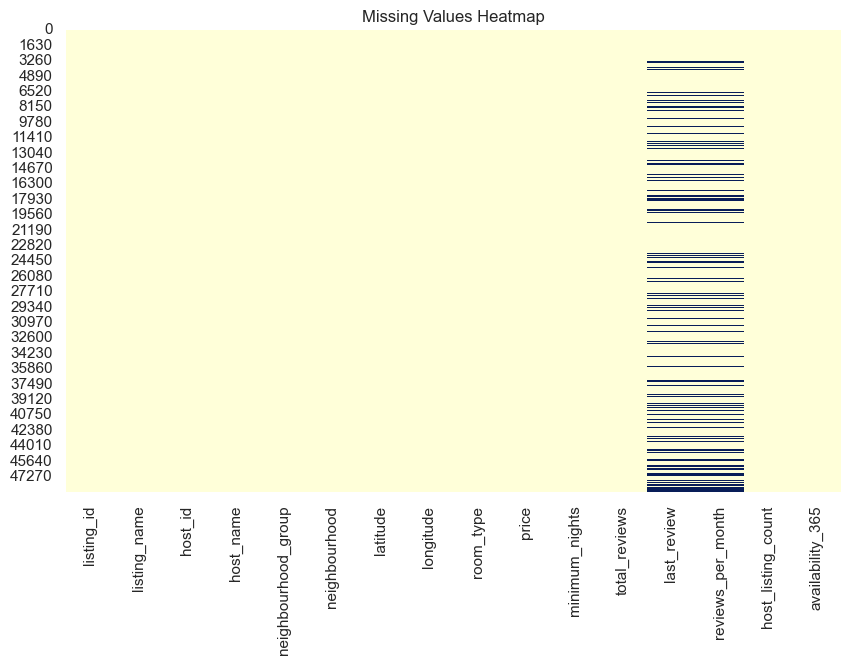

In [171]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False , fmt="d", cmap="YlGnBu")
plt.title("Missing Values Heatmap")
plt.show()

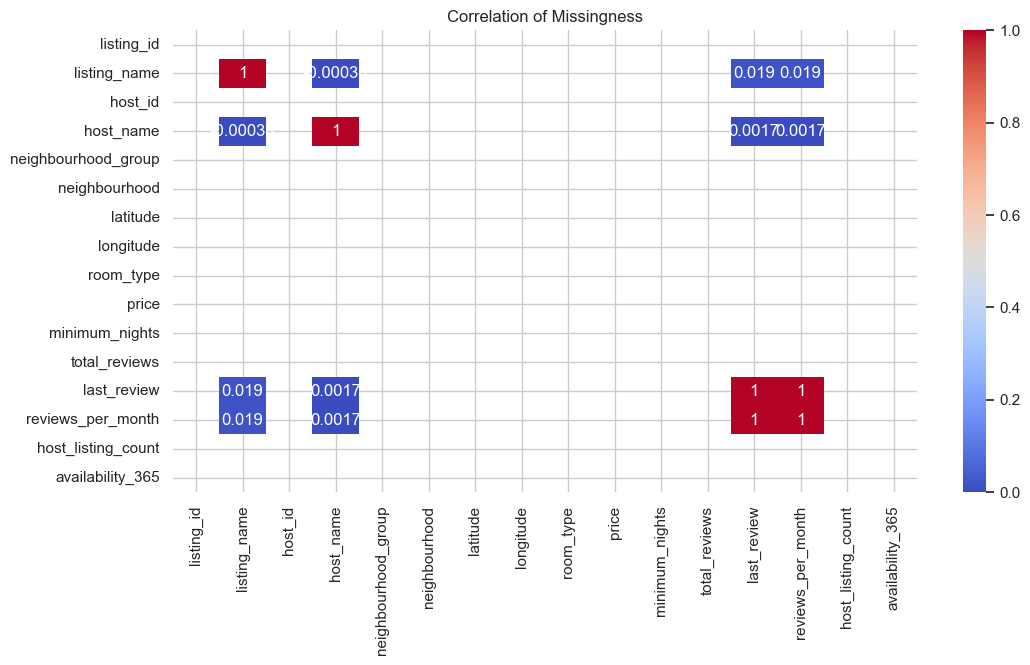

In [172]:
missing_correlation = df.isnull().corr()
sns.heatmap(missing_correlation, annot=True, cmap='coolwarm')
plt.title('Correlation of Missingness')
plt.show()

It seems like last_review and reviews_per_month have a correlation index of 1.

In [173]:
missing_by_type = df.groupby('room_type').agg({'listing_name': 'count', 'host_name': 'count'})
print(missing_by_type)

                 listing_name  host_name
room_type                               
Entire home/apt         25402      25400
Private room            22318      22314
Shared room              1159       1160


In [174]:
null_counts = df[df['listing_name'].isnull()].groupby('room_type').size()
print(null_counts)

room_type
Entire home/apt    7
Private room       8
Shared room        1
dtype: int64


In [175]:
print(df[df['host_name'].isnull()].groupby('room_type').size())

room_type
Entire home/apt     9
Private room       12
dtype: int64


In [176]:
nulls_both = df[df['last_review'].isnull() & df['reviews_per_month'].isnull()]
print(nulls_both[['last_review', 'reviews_per_month']])

      last_review  reviews_per_month
2             NaN                NaN
19            NaN                NaN
26            NaN                NaN
36            NaN                NaN
38            NaN                NaN
...           ...                ...
48890         NaN                NaN
48891         NaN                NaN
48892         NaN                NaN
48893         NaN                NaN
48894         NaN                NaN

[10052 rows x 2 columns]


In [177]:
count_nulls = df[['last_review', 'reviews_per_month']].isnull().sum()
print(count_nulls)

last_review          10052
reviews_per_month    10052
dtype: int64


I discovered that **listing_name** and **host_name** are not that much of null values, and the null values
are quite evenly distributed among different **room_type**. Therefore, we are going to fill the null values with
some substitutes. The columns **last_review** and **reviews_per_month** have total 10052 null values each, null values in **last_review**
also appears to have null values in **reviews_per_month**.
**last_review** column is not required for our analysis as compared to **number_of_reviews** & **reviews_per_month**. We've decided to drop this column.

In [178]:
df = df.drop(columns=['last_review'],axis=1)


In [179]:
df.info() # last_review has been removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  reviews_per_month    38843 non-null  float64
 13  host_listing_count   48895 non-null  int64  
 14  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(7), object(5)
m

In [180]:
df['listing_name'] = df['listing_name'].fillna('unknown')
df['host_name'] = df['host_name'].fillna('unknown')


In [181]:
df.head(10) # all unknowns in listing_name and host_name has been changed to 'unknown'

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listing_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


The **reviews_per_month** contains null values as well, replace unknowns with 0.

In [182]:
df['reviews_per_month'] = df['reviews_per_month'].replace(to_replace=np.nan, value=0)

In [183]:
df['reviews_per_month'].isnull().sum()

np.int64(0)

All null values has been replaced by corresponding values.

# **Check Unique Values for variables**


In [184]:
df['listing_id'].nunique()

48895

All listing_id are different and each listings are different

In [185]:
df['host_id'].nunique()

37457

In [186]:
df['host_name'].nunique()

11453

In [187]:
df['listing_name'].nunique()

47906

There are 37457 unique **host_id**s but only 11453 unique **host_name**s, this may suggest that some hosts may have multiple
listings under the same name and same ID, same **host_name** with different **host_id**. The **host_name** column only
contains first name of the host. This suggests that many hosts with the same first name are operating multiple listings
 under different **host_id**s. This could complicate analyses related to host performance and reputation. Comparing the unique number
 of **listing_name** with **host_name** and **host_id**, there's a probability that the same host is listing the same property
 with different descriptions to attract various consumers to view.


The dataset may have many entries for common first names, making it difficult to analyze trends or behaviors associated with specific hosts. This could skew results in analysis that involve host-related metrics.

In [188]:
df['neighbourhood'].nunique()

221

In [189]:
df['neighbourhood_group'].nunique()

5

In [190]:
df[df['host_name']=='David']['listing_name'].nunique()

402

In [191]:
df[df['listing_name']==df['host_name']].head() # some have listing_name same as host_name


,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listing_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,0.00,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,0.08,18,90


In [192]:
df.loc[(df['neighbourhood_group']=='Queens') & (df['host_name']=='Alex')]


,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listing_count,availability_365
3523,2104910,SPACIOUS APT BK/QUEENS w/BACKYARD!,10643810,Alex,Queens,Ridgewood,40.70988,-73.90845,Entire home/apt,99,2,57,0.89,1,42
4512,3116519,Large 900 sqft Artist's Apartment,3008690,Alex,Queens,Ridgewood,40.70124,-73.90941,Entire home/apt,70,10,0,0.00,1,0
6178,4518242,Zen MiniPalace Astoria,23424461,Alex,Queens,Astoria,40.76369,-73.91601,Entire home/apt,80,1,3,0.05,1,0
10543,8090529,"Modern studio in Queens, NY",17377835,Alex,Queens,Sunnyside,40.74674,-73.91881,Entire home/apt,250,3,0,0.00,1,364
10681,8211513,"Cozy Room, In Quiet Neighborhood",43299973,Alex,Queens,Ridgewood,40.70468,-73.90553,Private room,40,2,1,0.02,1,0
11479,8924966,1BR+Futon+Terrace 20' to Manhattan,27502041,Alex,Queens,Sunnyside,40.74746,-73.91416,Entire home/apt,99,3,40,0.91,1,128
14188,10939710,NEW YORK LOFTLIKE APARTMENT,9192860,Alex,Queens,Ridgewood,40.70286,-73.90649,Private room,71,3,62,2.76,1,291
19986,15999129,Railroad Style 1 B.R. Astoria Bachelor Pad,102278506,Alex,Queens,Astoria,40.75989,-73.91343,Entire home/apt,110,21,6,0.19,1,0
25380,20302205,"Quiet, Spacious, Artsy 1-Bedroom in Ridgewood",38266438,Alex,Queens,Ridgewood,40.70216,-73.89944,Entire home/apt,75,10,1,0.04,1,0
25655,20541892,"Lovely Apartment in trendy Astoria, Queens",146677115,Alex,Queens,Astoria,40.76437,-73.91937,Entire home/apt,250,3,3,0.16,1,1


# **Describe the Dataset and removing outliers**


In [193]:
df.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listing_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


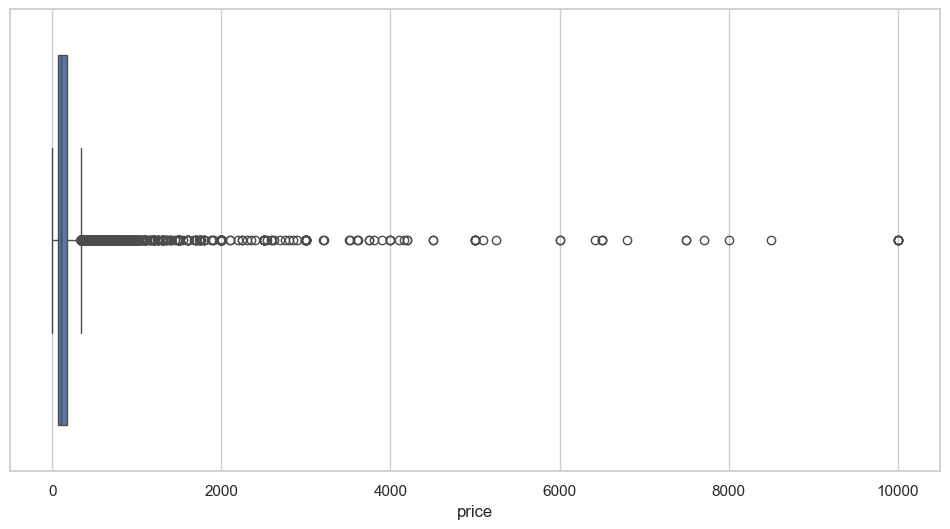

In [194]:
sns.boxplot(x = df['price'])

plt.show()

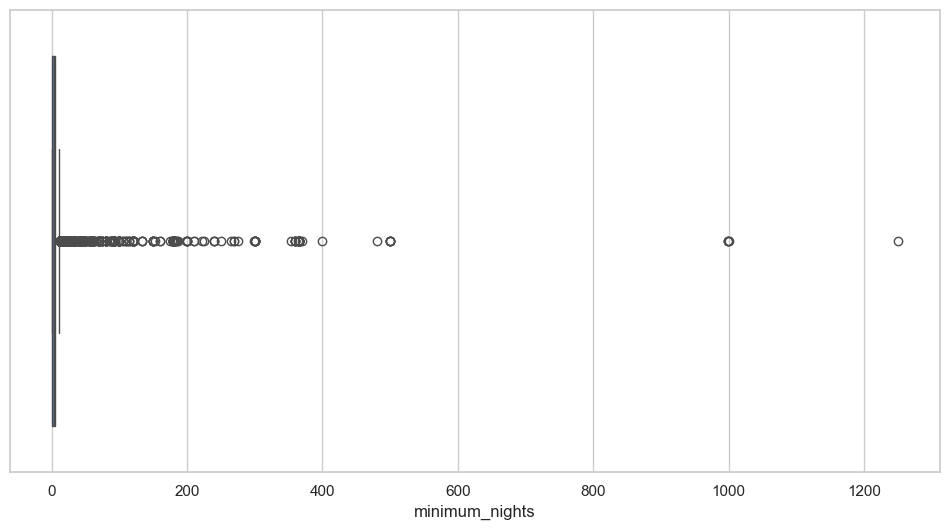

In [195]:
sns.boxplot(x = df['minimum_nights'])
plt.show()

In [196]:
df[df['minimum_nights'] > 400]

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listing_count,availability_365
2854,1615764,unknown,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,0.00,1,362
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,0.03,1,365
7355,5431845,Beautiful Fully Furnished 1 bed/bth,3680008,Aliya,Queens,Long Island City,40.75104,-73.93863,Entire home/apt,134,500,30,0.57,1,90
8014,6169897,Wonderful Large 1 bedroom,10720264,John,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,0.00,1,362
10829,8341919,Brand New Luxury Apt Lease Takeover,43945071,Shining,Queens,Long Island City,40.74654,-73.95778,Entire home/apt,199,480,0,0.00,1,365
11193,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,0.22,1,365
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,0.07,1,42
14285,11096888,Peaceful apartment close to F/G,2228137,Amanda,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,0.00,1,358
26341,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,1.12,6,249
38664,30378211,Shared Studio (females only),200401254,Meg,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,0.00,1,365


In [197]:
df[df['price'] == 10000]

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,reviews_per_month,host_listing_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83


There are observations where minimum nights of stay are greater than 400. However, a minimum stay of 1250 nights is highly suspicious.
We also found that there are prices that are $0. Further investigation are needed to verify whether it's advertisement promotion
or scam.


We are not interested in prices with $0.

In [198]:
df=df.loc[df['price']>0]
df.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listing_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


75% of the listings have the price of below $175.

In [199]:
relevent=['price','minimum_nights','total_reviews','reviews_per_month','host_listing_count','availability_365','latitude','longitude']

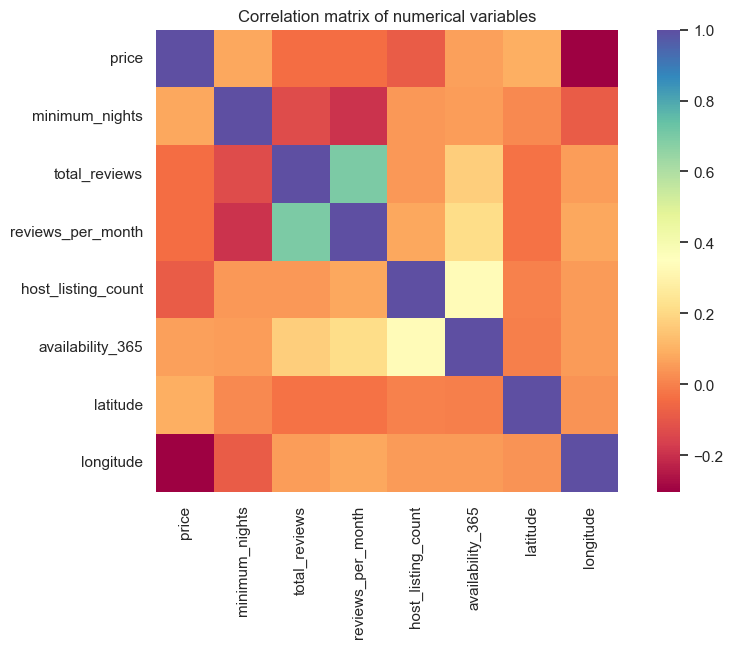

In [200]:
plt.figure(figsize=(10,6))
title = 'Correlation matrix of numerical variables'
sns.heatmap(df[relevent].corr(method='kendall'),cmap='Spectral', square=True)
plt.title(title)
plt.show()

From the above correlation matrix, we found that total_review and reviews_per_month are highly correlated as compared to
other variables.

# Visualization and Observations

In [201]:
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)                        # interquantile range

  return lower_range,upper_range
lower_bound,upper_bound = iqr_technique(df['price'])
df2 = df[(df.price>lower_bound) & (df.price<upper_bound)]

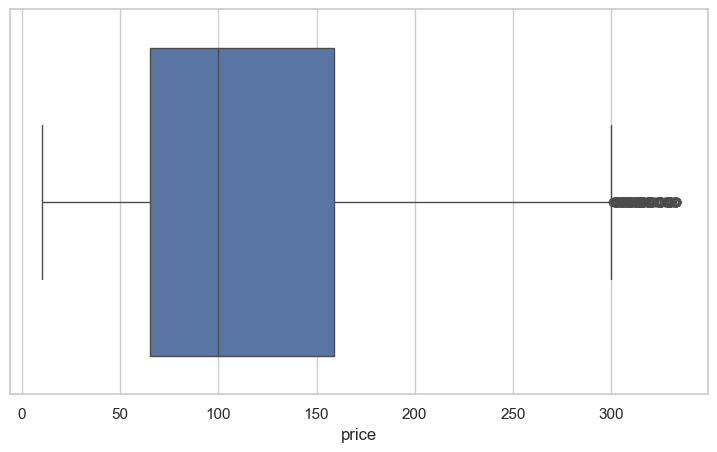

In [202]:
plt.figure(figsize=(9,5))
sns.boxplot(x= df2['price'])
plt.show()

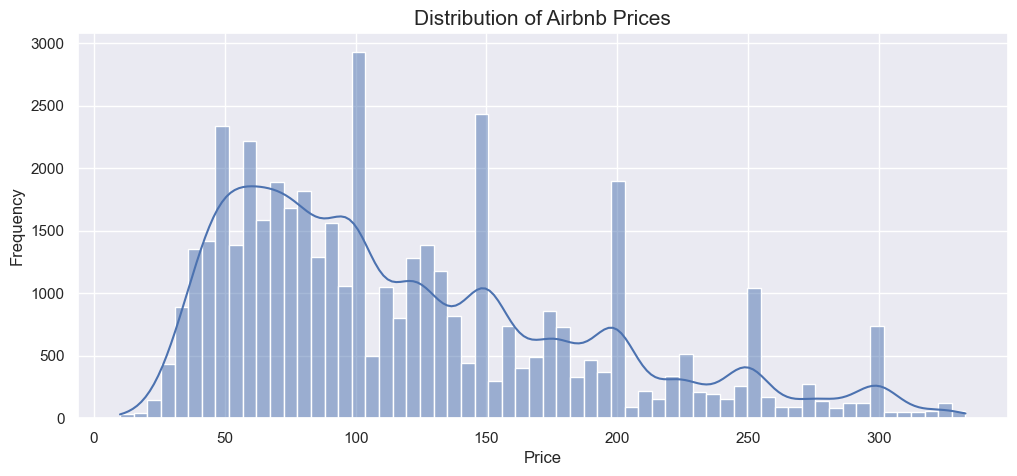

In [203]:
# Create a figure with a custom size
plt.figure(figsize=(12, 5))

# Set the seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

# Create a histogram of the 'price' column of the Airbnb_df dataframe
# using sns distplot function and specifying the color as red
sns.histplot(df2['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Add a title to the plot
plt.title('Distribution of Airbnb Prices',fontsize=15)
plt.show()

For visual simplicity, I've removed the outliers from the price column so we could have a better understanding of price distribution.
*   The range of prices being charged on Airbnb appears to be from **20 to 330 dollars** , with the majority of listings falling in the price range of **50 to 150 dollars.**

*   The distribution of prices appears to have a peak in the **50 to 150 dollars range**, with a relatively lower density of listings in higher and lower price ranges.

*   There may be fewer listings available at prices above **250 dollars**, as
the density of listings drops significantly in this range.

---

#### **Neighbourhood Group listings**

In [204]:
neighbor_group = df.groupby('neighbourhood_group')['listing_id'].count().reset_index()
sort = neighbor_group.sort_values('listing_id', ascending=False)
print(sort)


  neighbourhood_group  listing_id
2           Manhattan       21660
1            Brooklyn       20095
3              Queens        5666
0               Bronx        1090
4       Staten Island         373


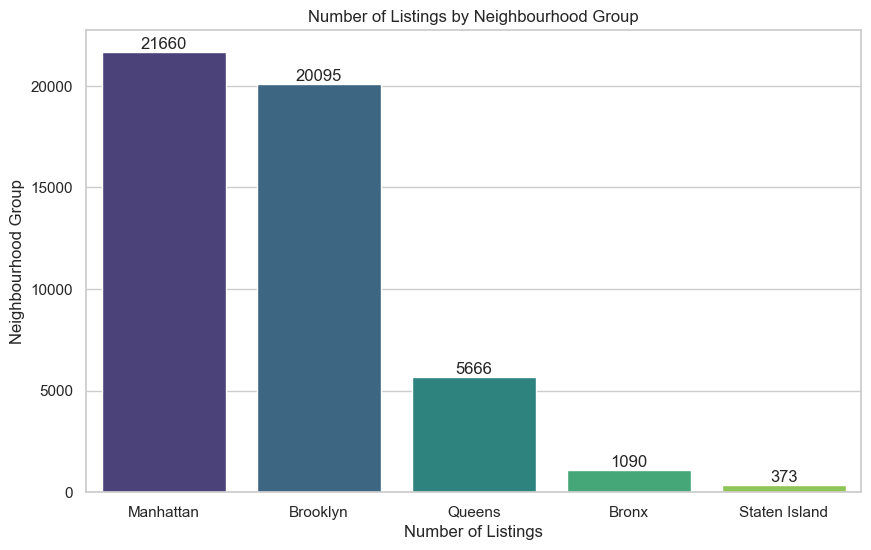

In [205]:
sns.set(style="whitegrid")
# Create the bar plot
plt.figure(figsize=(10, 6))
barplot1 = sns.barplot(x='neighbourhood_group', y='listing_id', data=sort, palette='viridis',hue='neighbourhood_group')
# Add titles and labels
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood Group')

for p in barplot1.patches:
    barplot1.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2, p.get_height()),
                      ha='center', va='bottom')

# Show the plot
plt.show()

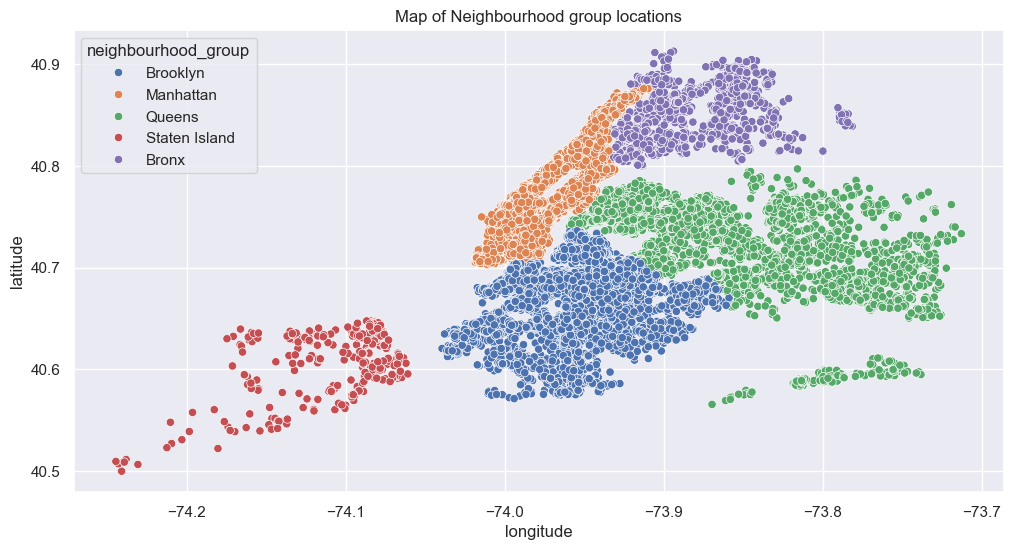

In [206]:
title='Map of Neighbourhood group locations'
sns.set(rc={"figure.figsize":(12, 6)})
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df['neighbourhood_group']).set_title(title)
plt.show()


**Observations -->**

*   Manhattan and Brooklyn have the highest number of listings on Airbnb, with over 20,000 listings each.

*   Queens and the Bronx have significantly fewer listings compared to Manhattan and Brooklyn

*   Staten Island has the fewest number of listings, with only 373.

*   The distribution of listings across the different neighborhood groups is skewed, with a concentration of listings in Manhattan and Brooklyn.
---
---





**Average Price of Each Neighbourhood Group**


In [207]:
avg_price = df.groupby('neighbourhood_group')['price'].mean().reset_index().sort_values('price',ascending=False).rename(columns={'price':'Average Price'}).round(2) # find average price of listings among the five neighbourhoods
avg_price

,neighbourhood_group,Average Price
2,Manhattan,196.88
1,Brooklyn,124.44
4,Staten Island,114.81
3,Queens,99.52
0,Bronx,87.58


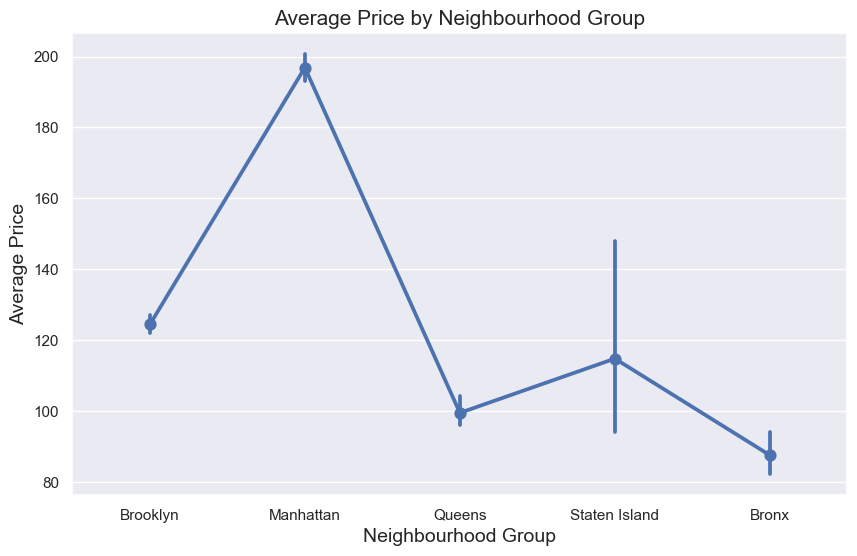

In [208]:
from statistics import mean
plt.figure(figsize=(10,6))
sns.pointplot(data= df, x='neighbourhood_group', y='price',estimator=np.mean)
plt.xlabel('Neighbourhood Group',fontsize=14)
plt.ylabel('Average Price',fontsize=14)
plt.title('Average Price by Neighbourhood Group',fontsize=15)
plt.show()

**Observations -->**
*   The average price of a listing in New York City varies significantly across different neighborhoods, with **Manhattan having the highest 197 dollars/day average price** and **the Bronx having the lowest near 87 dollars/day.**
*   The average price increases as you move from the outer boroughs (Bronx, Brooklyn, Queens, and Staten Island) towards the center of the city (Manhattan).

---
---
**Neighbourhoods With the Highest number of Listing**

In [209]:
n_listings = df['neighbourhood'].value_counts().reset_index()
n_listings.columns = ['neighbourhood', 'listing_count']  # Rename columns
# Merge with the original DataFrame to get neighbourhood_group
n_listings_with_group = n_listings.merge(df[['neighbourhood', 'neighbourhood_group']].drop_duplicates(), on='neighbourhood')
n_listings_with_group.nlargest(10, ['listing_count'])

,neighbourhood,listing_count,neighbourhood_group
0,Williamsburg,3919,Brooklyn
1,Bedford-Stuyvesant,3710,Brooklyn
2,Harlem,2658,Manhattan
3,Bushwick,2462,Brooklyn
4,Upper West Side,1971,Manhattan
5,Hell's Kitchen,1958,Manhattan
6,East Village,1853,Manhattan
7,Upper East Side,1798,Manhattan
8,Crown Heights,1564,Brooklyn
9,Midtown,1545,Manhattan


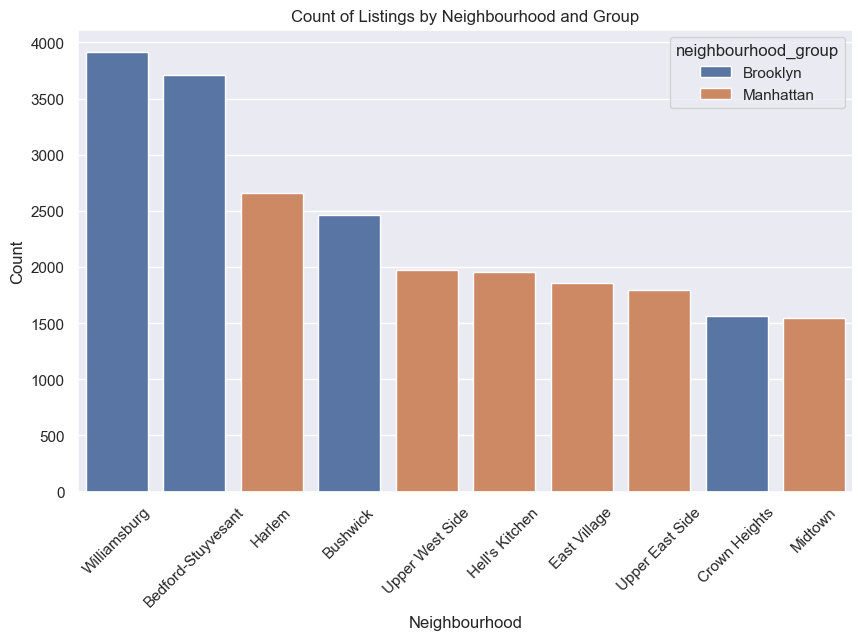

In [210]:
plt.figure(figsize=(10, 6))
sns.barplot(data=n_listings_with_group.nlargest(10,['listing_count']), x='neighbourhood', y='listing_count', hue='neighbourhood_group')
# Add titles and labels
plt.xticks(rotation=45)
plt.title('Count of Listings by Neighbourhood and Group')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')

# Show the plot
plt.show()

**Observations -->**

*   The top neighborhoods in New York City in terms of listing counts are Williamsburg, Bedford-Stuyvesant, Harlem, Bushwick, and the Upper West Side. The top neighborhoods are primarily located in Brooklyn and Manhattan. This may be due to the fact that these boroughs have a higher overall population and a higher demand for housing.
---
---



**Highest Listings with Host_id**

As mentioned earlier, we found that there are 37457 unique **host_id**s among all observations.

In [211]:
host_listings = df.groupby(['host_id', 'host_name'])['listing_id'].count().reset_index()
# Rename the columns for clarity
host_listings.columns = ['host_id', 'host_name', 'listing_count']
# Display the result
host_listings = host_listings.sort_values('listing_count', ascending=False).nlargest(10,'listing_count').reset_index()
host_listings

,index,host_id,host_name,listing_count
0,34644,219517861,Sonder (NYC),327
1,29405,107434423,Blueground,232
2,19572,30283594,Kara,121
3,31077,137358866,Kazuya,103
4,14434,16098958,Jeremy & Laura,96
5,12805,12243051,Sonder,96
6,25660,61391963,Corporate Housing,91
7,17089,22541573,Ken,87
8,33866,200380610,Pranjal,65
9,9732,7503643,Vida,52


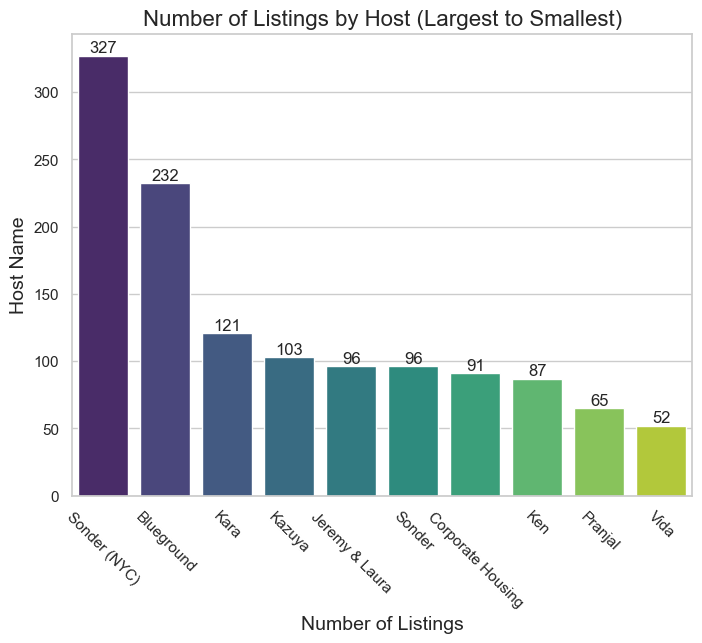

In [212]:
sns.set(style="whitegrid")
# Create a bar plot
plt.figure(figsize=(8, 6))
barplot2 = sns.barplot(x='host_name', y='listing_count', data=host_listings, palette='viridis',hue='host_name')

# Add titles and labels
plt.title('Number of Listings by Host (Largest to Smallest)', fontsize=16)
plt.xlabel('Number of Listings', fontsize=14)
plt.ylabel('Host Name', fontsize=14)
plt.xticks(rotation=315)
# Show the plot
for p in barplot2.patches:
    barplot2.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2, p.get_height()),
                      ha='center', va='bottom')
plt.show()

**Observations -->**

*   The top three hosts in terms of total listings are Sonder(NYC), Blueground, and Kara, who have 327, 232, and 121 listings, respectively.
*   In this top10 list Sonder(NYC) has 327 listings, which is significantly higher than Vida's 52 listings. This could indicate that there is a lot of variation in the success of different hosts on Airbnb.
*   The host name Sonder appeared twice in the top 10 list, one called Sonder(NYC) and the other one is called Sonder. The two hosts
with the same name are most likely the same company, but registered with multiple IDs.
---
---

**Room Type at Each Neighbourhood Group**

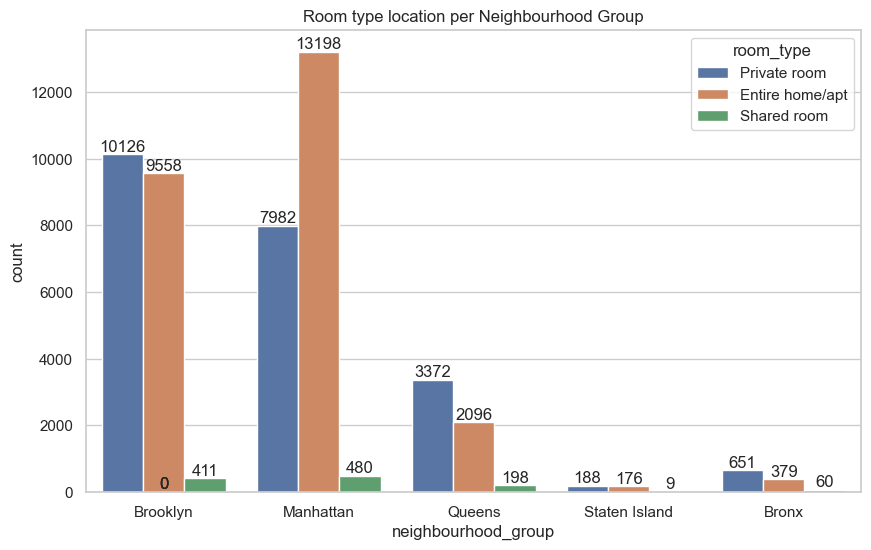

In [213]:
plt.figure(figsize=(10, 6))
plot3 = sns.countplot(x='neighbourhood_group',hue='room_type', data=df)
plt.title('Room type location per Neighbourhood Group')
for p in plot3.patches:
    plot3.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2, p.get_height()),
                      ha='center', va='bottom')
plt.show()

*   Listing of **Entire home/apt** is the highest in Manhattan while Brooklyn has **Private room** listing at the highest, though **Entire home/apt** listing is not so far behind.
*   It can be observed that shared rooms have less listing in each of neighbourhood groups.

In [214]:
# avg price of each room type in each neighbourhood group
avg_price_room_group= df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index().round(2)
avg_price_room_group

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.51
1,Bronx,Private room,66.89
2,Bronx,Shared room,59.80
3,Brooklyn,Entire home/apt,178.35
4,Brooklyn,Private room,76.55
5,Brooklyn,Shared room,50.77
6,Manhattan,Entire home/apt,249.26
7,Manhattan,Private room,116.78
8,Manhattan,Shared room,88.98
9,Queens,Entire home/apt,147.05


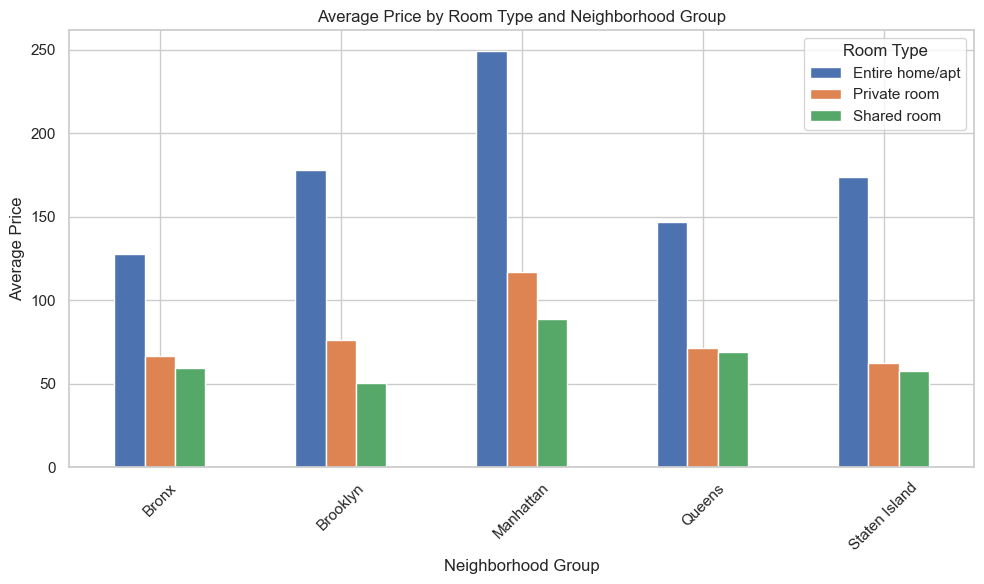

In [215]:
pivot_df = avg_price_room_group.pivot(index='neighbourhood_group', columns='room_type', values='price')
# Plotting
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.title('Average Price by Room Type and Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

* Although Manhattan has the highest average price in terms of **Entire home/apt**, but the amount of listings in Manhattan is still the  highest among the five neighbourhoods. Manhattan is the only neighbourhood group where **Entire home/apt** listings are higher than **private Room**. People seem to prefer **Private Room** more in other neighbourhood group instead, as price is halved of Entire home/apt.
* Average price of **Private Room**s in Bronx, Brooklyn, Queens and Staten Island are similar, Manhattan is much higher.
---
---



**Price**

In [216]:
average_price = df.groupby(['neighbourhood', 'neighbourhood_group'])['price'].mean().reset_index()

# Rename the columns for clarity
average_price.columns = ['neighbourhood', 'neighbourhood_group', 'average_price']

# Display the result
average_price.nlargest(10, ['average_price'])

,neighbourhood,neighbourhood_group,average_price
82,Fort Wadsworth,Staten Island,800.000000
219,Woodrow,Staten Island,700.000000
197,Tribeca,Manhattan,490.638418
174,Sea Gate,Brooklyn,487.857143
167,Riverdale,Bronx,442.090909
157,Prince's Bay,Staten Island,409.500000
6,Battery Park City,Manhattan,367.557143
75,Flatiron District,Manhattan,341.925000
161,Randall Manor,Staten Island,336.000000
144,NoHo,Manhattan,295.717949


In [217]:
neigh_group_price_group = df.groupby(['neighbourhood_group']).agg({'price':'median'}).reset_index()
neigh_group_price_group

,neighbourhood_group,price
0,Bronx,65.0
1,Brooklyn,90.0
2,Manhattan,150.0
3,Queens,75.0
4,Staten Island,75.0


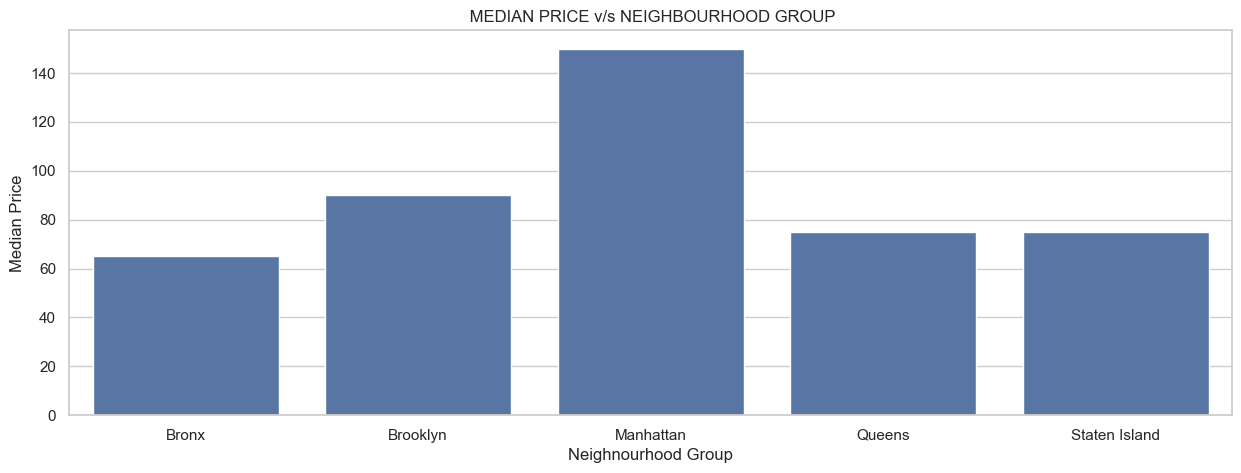

In [218]:
plt.figure(figsize=(15,5))
ax_12 = sns.barplot(x = 'neighbourhood_group',y = 'price',data = neigh_group_price_group)
ax_12.set_title(' MEDIAN PRICE v/s NEIGHBOURHOOD GROUP')
ax_12.set_xlabel('Neighnourhood Group')
ax_12.set_ylabel("Median Price")
plt.show()

* Due to the existence of outliers, looking at the average is no longer trustworthy. We have to check the median of the price for more accurate information. Manhattan has a significantly higher price than other regions, followed by Brooklyn, Queens/Staten Island and Bronx.


In [219]:
neigh_price_group = df.groupby(['neighbourhood']).agg({'price':'median'}) .reset_index()
neigh_price_group = neigh_price_group.merge(df[['neighbourhood', 'neighbourhood_group']].drop_duplicates(), on='neighbourhood')
neigh_price_group

,neighbourhood,price,neighbourhood_group
0,Allerton,66.5,Bronx
1,Arden Heights,72.5,Staten Island
2,Arrochar,65.0,Staten Island
3,Arverne,125.0,Queens
4,Astoria,85.0,Queens
...,...,...,...
216,Windsor Terrace,123.0,Brooklyn
217,Woodhaven,52.0,Queens
218,Woodlawn,68.0,Bronx
219,Woodrow,700.0,Staten Island


In [220]:
# Count the number of listings in each neighbourhood
listings_count = df.groupby('neighbourhood').size().reset_index(name='listing_count')

# Merge with the neighbourhood_group information
listings_count = listings_count.merge(
    df[['neighbourhood', 'neighbourhood_group']].drop_duplicates(),
    on='neighbourhood'
)
# Calculate total listings per neighbourhood_group
total_listings_group = listings_count.groupby('neighbourhood_group')['listing_count'].sum().reset_index(name='total_listings')
# Merge total listings back into the listings_count DataFrame
listings_count = listings_count.merge(total_listings_group, on='neighbourhood_group')
# Calculate the percentage of listings in each neighbourhood
listings_count['percentage'] = (listings_count['listing_count'] / listings_count['total_listings']) * 100
# Select relevant columns for final output
listings_count = listings_count[['neighbourhood', 'neighbourhood_group', 'listing_count', 'percentage']]
listings_count

,neighbourhood,neighbourhood_group,listing_count,percentage
0,Allerton,Bronx,42,3.853211
1,Arden Heights,Staten Island,4,1.072386
2,Arrochar,Staten Island,21,5.630027
3,Arverne,Queens,77,1.358983
4,Astoria,Queens,900,15.884222
...,...,...,...,...
216,Windsor Terrace,Brooklyn,157,0.781289
217,Woodhaven,Queens,88,1.553124
218,Woodlawn,Bronx,11,1.009174
219,Woodrow,Staten Island,1,0.268097


In [221]:
# Merge the listings count with the median price DataFrame
merged_df = listings_count.merge(neigh_price_group, on='neighbourhood')
merged_df['percentage'] = merged_df['percentage'].round(2)
merged_df

,neighbourhood,neighbourhood_group_x,listing_count,percentage,price,neighbourhood_group_y
0,Allerton,Bronx,42,3.85,66.5,Bronx
1,Arden Heights,Staten Island,4,1.07,72.5,Staten Island
2,Arrochar,Staten Island,21,5.63,65.0,Staten Island
3,Arverne,Queens,77,1.36,125.0,Queens
4,Astoria,Queens,900,15.88,85.0,Queens
...,...,...,...,...,...,...
216,Windsor Terrace,Brooklyn,157,0.78,123.0,Brooklyn
217,Woodhaven,Queens,88,1.55,52.0,Queens
218,Woodlawn,Bronx,11,1.01,68.0,Bronx
219,Woodrow,Staten Island,1,0.27,700.0,Staten Island


IndexError: single positional indexer is out-of-bounds

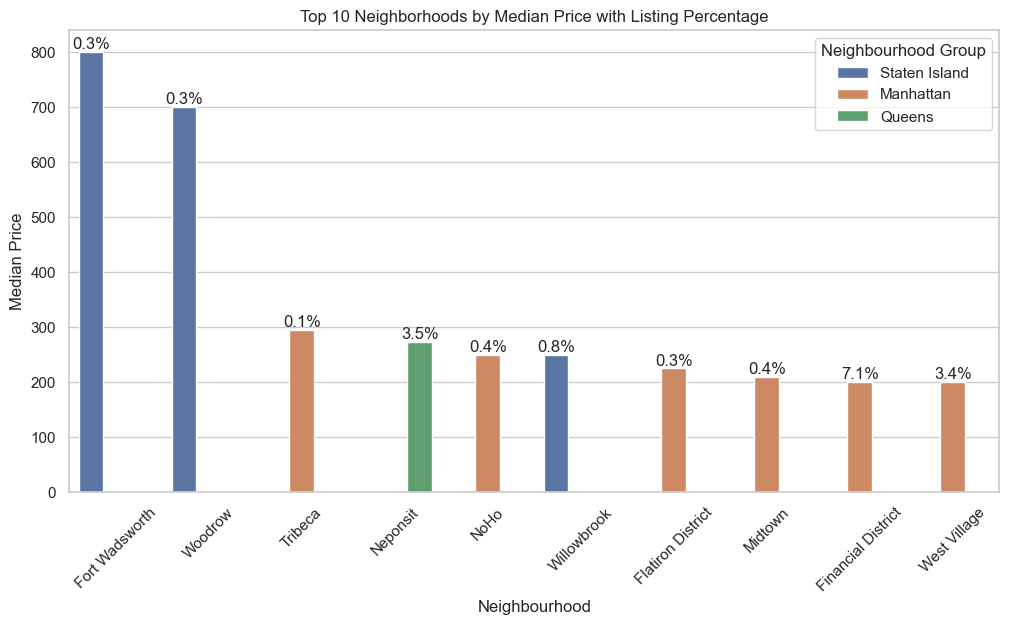

In [227]:
# Plotting
top_10_neighborhoods = merged_df.nlargest(10, 'price')

# Plotting
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_10_neighborhoods, x='neighbourhood', y='price', hue='neighbourhood_group_y', dodge=True)
plt.title('Top 10 Neighborhoods by Median Price with Listing Percentage')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood Group')

# Annotate the bars with percentage values
for i, p in enumerate(bar_plot.patches):
    percentage = top_10_neighborhoods['percentage'].iloc[i]
    bar_plot.annotate(f'{percentage:.1f}%',
                      (p.get_x() + p.get_width() / 2, p.get_height()),
                      ha='center', va='bottom')

plt.tight_layout()
plt.show()

*   The above graph shows the median price in each neighbourhood and the percentage. For all the listings in Manhattan, 7.1% of the listings are in the Financial District neighbourhood and the median price at that region is around $200. This suggests that if you are traveller/host, this might be the best neighbourhood to have your listings.

<Axes: title={'center': 'Average Airbnb Reviews by Neighborhoods in New York City'}, xlabel='longitude', ylabel='latitude'>

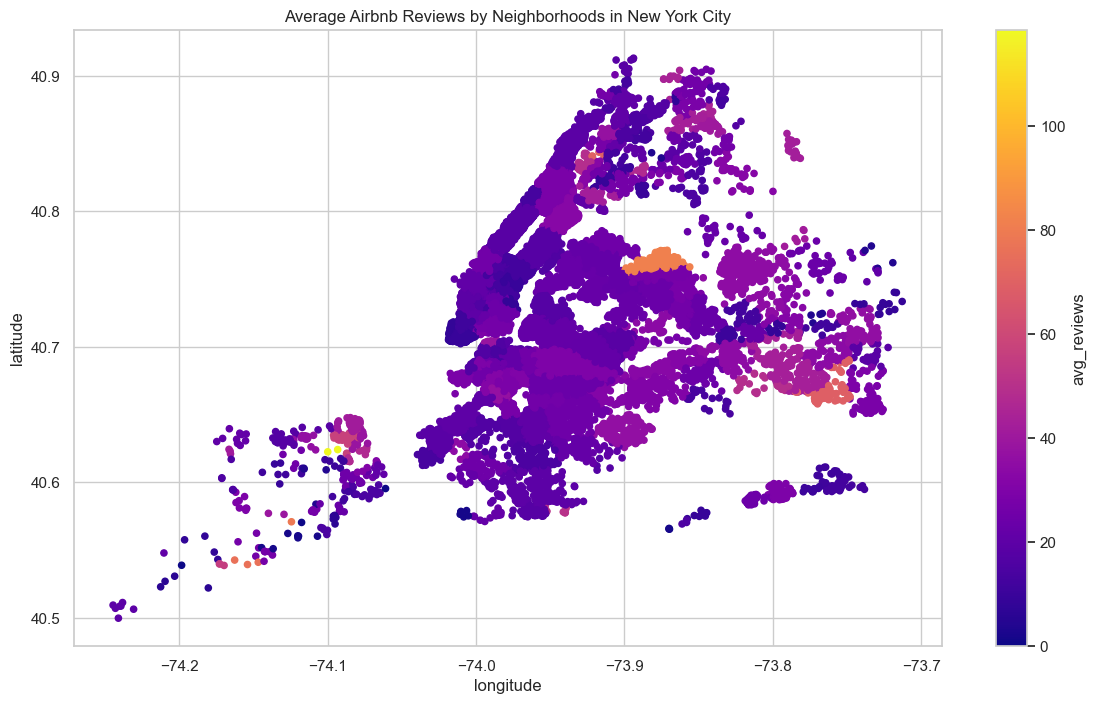

In [225]:
neighbourhood_avg_reviews = df.groupby("neighbourhood")["total_reviews"].mean()

# Create a new DataFrame with the average number of reviews for each neighborhood
neighbourhood_reviews = pd.DataFrame({"neighbourhood": neighbourhood_avg_reviews.index, "avg_reviews": neighbourhood_avg_reviews.values})

# Merge the average number of reviews data with the original DataFrame
df = df.merge(neighbourhood_reviews, on="neighbourhood")

# Create the scattermapbox plot
fig = df.plot.scatter(x="longitude", y="latitude", c="avg_reviews", title="Average Airbnb Reviews by Neighborhoods in New York City", figsize=(14,8), cmap="plasma")

# Display the scatter map
fig


---

